# Seaborn

> В этой практике мы не только познакомимся с новой библиотекой визуализации, но и узнаем что-то новое про pandas.

Seaborn - библиотека для визуализации данных, которая основывается на matplotlib и релизует высокоуровневый функционал по отображению более сложных графиков.

[Официальный сайт](https://seaborn.pydata.org) содержит очень много полезной информации, а на [странице](https://seaborn.pydata.org/api.html) можно найти все функции библиотеки. 

> В данной практике рассмотрим основные возможности библиотеки, при этом многие функции применимы в достаточно специфичных ситуациях, поэтому при работе с данными не пренебрегайте поиском различных практик по отображению данных с использованием этой библиотеки, чтобы набраться опыта.

Установка библиотеки как всегда несложная:

In [4]:
!pip install seaborn==0.10.1

# Загрузка и базовый анализ данных

Так как seaborn применяется для отображения данных, то для более реалистичного примера мы используем реальный набор данных для визуализации.

> Исходно, данные были получены с сайта Kaggle - вот [страница с описанием данных](https://www.kaggle.com/abcsds/pokemon).

Импортируем все необходимые модули и загрузим данные:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Kail4eK/ml_edu/master/datasets/Pokemon.csv')
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Как видим, данные имеют 13 колонок. Официальная документация дает нам следующие описания колонок:
- **#** - идентификатор покемона;
- **Name** - название покемона;
- **Type 1** - тип покемона, описывающий его среду;
- **Type 2** - если не NaN, то тип состоит из двух частей;
- **Total** - сумма всех следующих показателей, общий показатель того, как силен покемон;
  - **HP** - очки жизни;
  - **Attack** - очки атаки;
  - **Defence** - очки защиты;
  - **Sp. Atk** - очки специальной атаки;
  - **Sp. Def** - очки защиты против специальной атаки;
  - **Speed** - скорость покемона (тот, кто первый атакует в схватке);
- **Generation** - поколение покемона;
- **Legendary** - флаг легендарного покемона.

Первым делом мы должны определить количество записей и типы колонок:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


В таблице 800 записей, колонки имен и типов являются строковыми, флаг легендарности - булевые, остальные - целочисленные. После этого полезно взглянуть на количество уникальных значений в каждой колонке с помощью метода `DataFrame.nunique()`:

> Понимание количества уникальных значений (особенно в строковых данных) позволяет выбрать признаки, по которым имеет смысл проводить анализ. 

> Слишком большое количество уникальных строковых значений делает колонку (признак) малопригодной для анализа и использования.

In [7]:
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

Мы видим, что колонки "#" и "Name" имеют слишком большое количество уникальных значений. Удалим их из наших данных:

In [8]:
df.drop(columns=['#', 'Name'], inplace=True)

# Встроенная визуализация pandas

Первым делом настроим отображение:

In [9]:
import matplotlib as mpl

TEXT_COLOR = 'black'

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelcolor'] = TEXT_COLOR
mpl.rcParams['xtick.color'] = TEXT_COLOR
mpl.rcParams['ytick.color'] = TEXT_COLOR

Pandas имеет некоторые методы для визуализации данных:

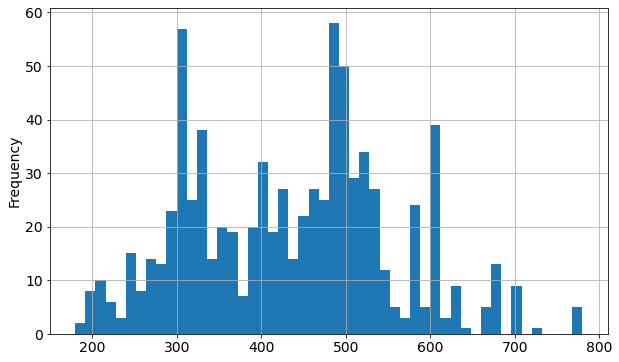

In [10]:
# Отображение гистограммы частот значений признака
# Отобразим данные в 50ти бинах (колонках гистограммы)
df['Total'].plot(kind='hist', bins=50)
plt.grid(True)
plt.show()

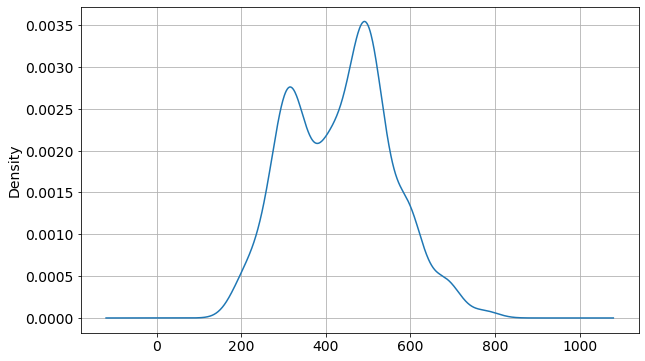

In [11]:
# Отображение данных в виде KDE (Kernel Density Estimation)
# Так называется плотность распределения переменной
df['Total'].plot(kind='kde')
plt.grid(True)
plt.show()

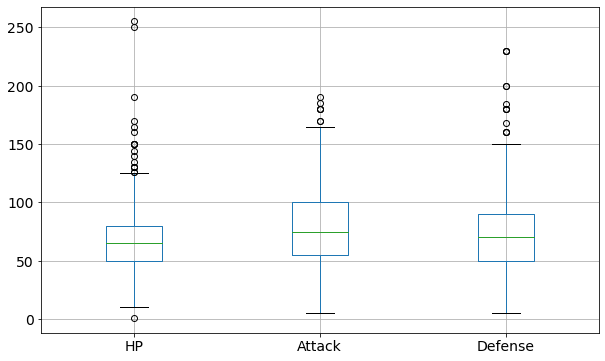

In [12]:
# Отображение трех признаков в виде "ящиков с усами"
df[['HP', 'Attack', 'Defense']].plot(kind='box')
plt.grid(True)
plt.show()

Отображение ящик с усами полезно для обзора численных данных:
- Линия внутри ящика - медиана;
- Верхняя и нижняя границы ящика - первый и третий квартили;
- Границы усов - "наблюдаемый" минимум/максимум;
- Точки - статистические выбросы.

> Более детальная информация: https://ru.wikipedia.org/wiki/Ящик_с_усами

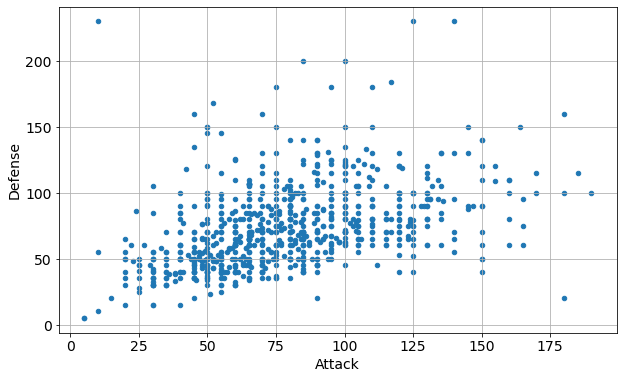

In [13]:
# Отображение точечного графика
# Задаем признаки, значения которых будет отображено по осям
df.plot(kind='scatter', x='Attack', y='Defense')
plt.grid(True)
plt.show()

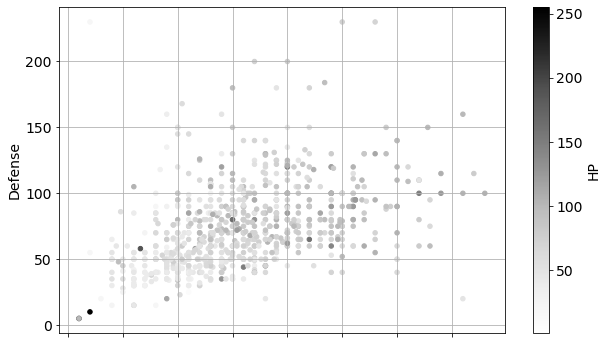

In [14]:
# Также, можно добавить третий признак на точечный график в виде цвета
df.plot(kind='scatter', x='Attack', y='Defense', c='HP')
plt.grid(True)
plt.show()

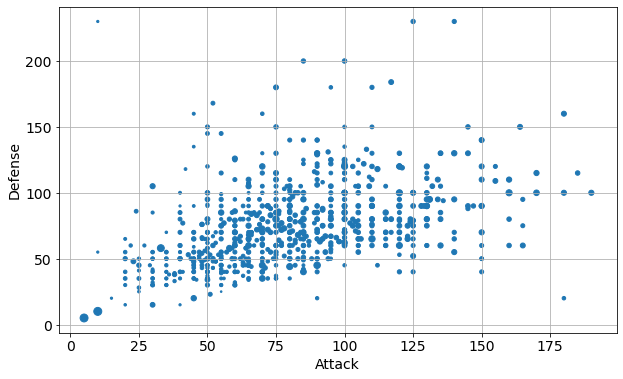

In [15]:
# Или в виде размера
df.plot(kind='scatter', x='Attack', y='Defense', s=df['HP']/4)
plt.grid(True)
plt.show()

# Первая визуализация с помощью seaborn

Как мы теперь знаем, данные можно отобразить с помощью инструментов matplotlib, pandas (тот же matplotlib, но методами pandas). Последний инструмент (seaborn) позволяет рисовать похожие графики, но в более обощенном виде.

Мы начнем знакомство с подхода анализа по одной переменной, в котором переменные (признаки) рассматриваются по отдельности.


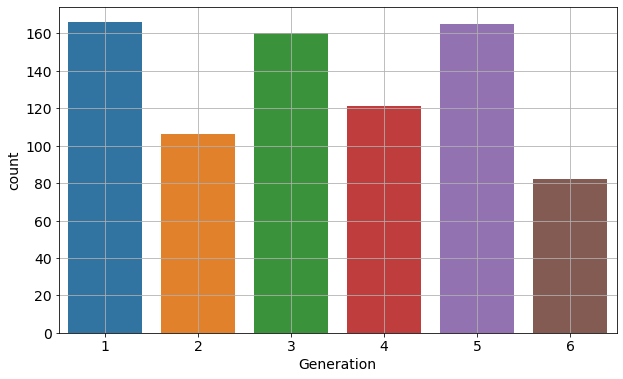

In [16]:
# Первый график - график количества значений
# Такой график отображает количества уникальных значений
# Хорошо подходит для категориальных признаков
sns.countplot(x='Generation', data=df)
plt.grid(True)
plt.show()

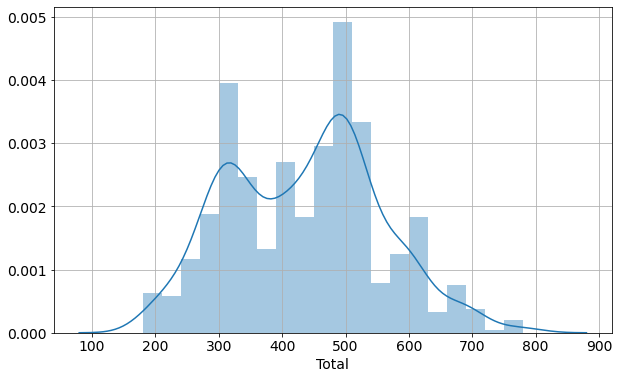

In [17]:
# Отображение графика простого распределения графика распределения признака
sns.distplot(df['Total'], bins=20)
plt.grid(True)
plt.show()

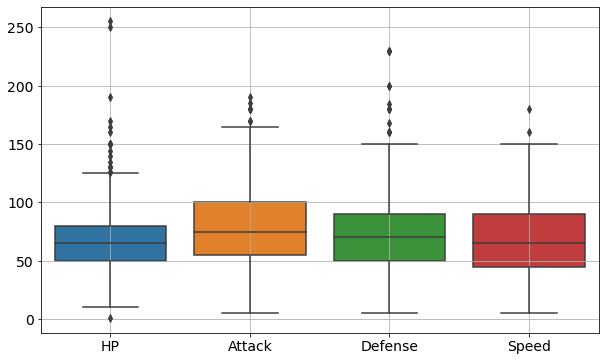

In [18]:
# Отображение графика "ящик с усами"
sns.boxplot(data=df[['HP', 'Attack', 'Defense', 'Speed']]);
plt.grid(True)
plt.show()

Другой визуализацией распредления является график скрипки, который показывает плотность распределения:

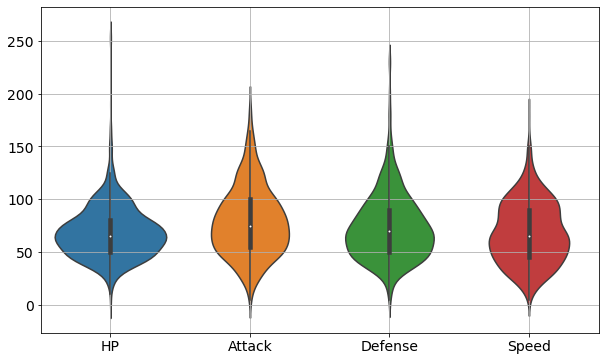

In [19]:
sns.violinplot(data=df[['HP', 'Attack', 'Defense', 'Speed']])
plt.grid(True)
plt.show()

## Задание

Отобразите график количества уникальных значений признака `Type 1`:

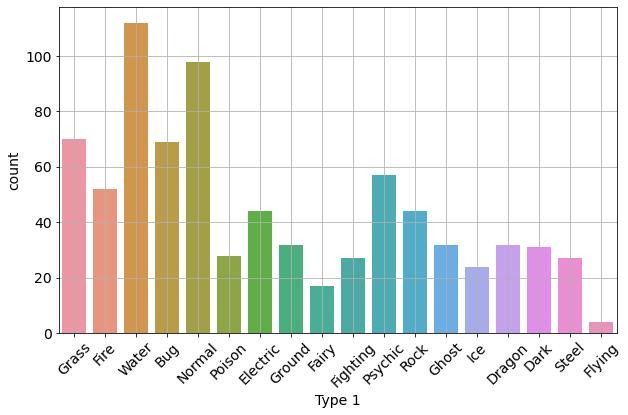

In [34]:
# TODO - отобразить график количеств типов
# Для удобочитаемости изучите, как повернуть подписи
#   функцией `plt.xticks()`

sns.countplot(x='Type 1', data=df)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Анализ по нескольким переменным

Анализ по нескольким переменным позволяет оценить не только характеристики конкретных признаков, но и взаимосвязи признаков.

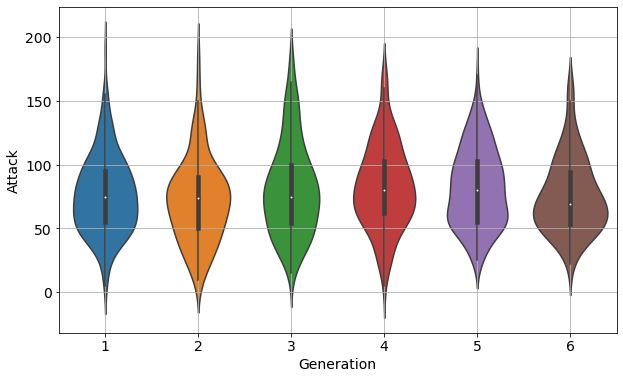

In [21]:
# График скрипки, но мы уже не просто отображаем отдельную переменную 
#   в каждой скрипке, а смотрим на распределение показателей атаки 
#   в зависимости от поколения
sns.violinplot(x='Generation', y='Attack', data=df)
plt.grid(True)
plt.show()

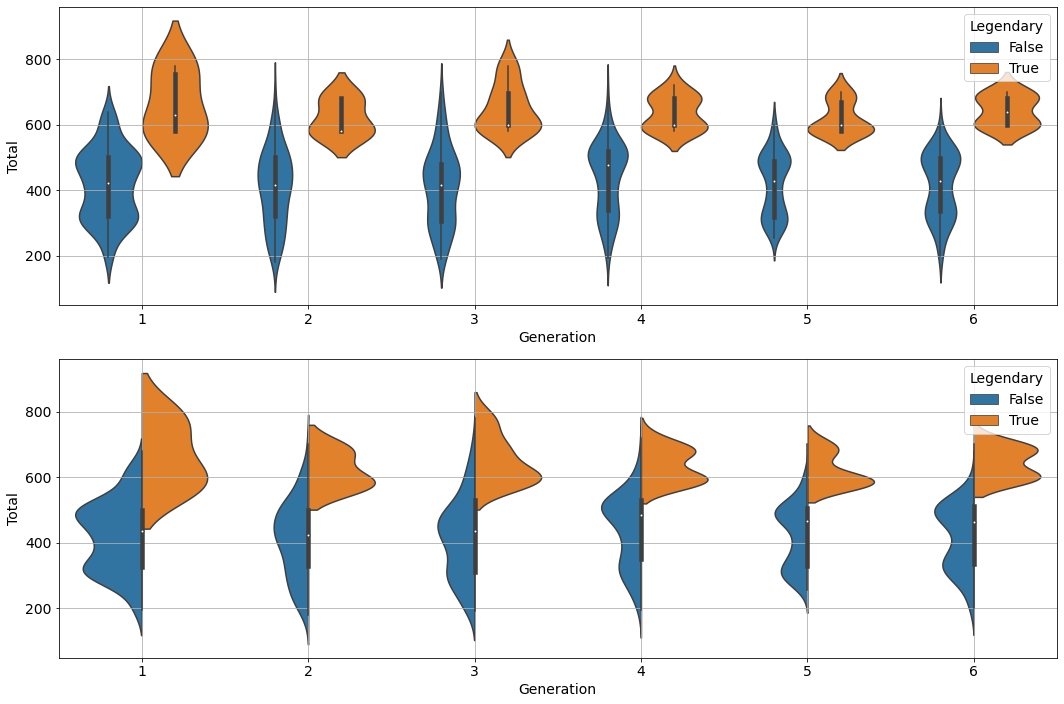

In [22]:
# Также, можем добавить отображение в зависимости еще и от флага легендарности
# split - для отображения в виде половинок (иначе будут отдельные графики)
# ax - для задания зоны отображения
fig, ax = plt.subplots(nrows=2, ncols=1, squeeze=False, figsize=[15, 10])

sns.violinplot(x='Generation', y='Total', hue='Legendary', data=df, ax=ax[0,0])
ax[0,0].grid(True)

sns.violinplot(x='Generation', y='Total', hue='Legendary', data=df, split=True, ax=ax[1,0])
ax[1,0].grid(True)

plt.tight_layout()
plt.show()

> Обратите внимание, что размещать с помощью зон отображения **все** графики seaborn можно при помощи аргумента `ax` или прямо управлением `plt.subplot()`.

## Задание

Отобразите график ящика с усами с помощью функции `sns.boxplot()`, отображая один из показателей `HP`, `Attack` или `Defense` от поколения и легендарности.

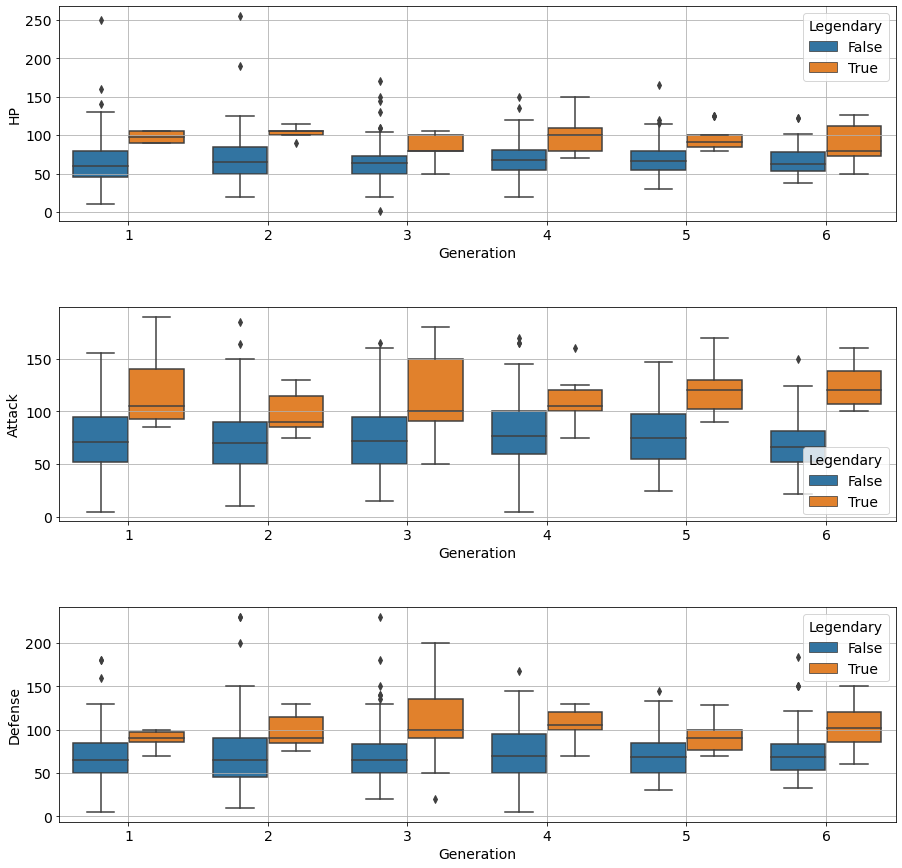

In [35]:
# TODO - отобразите график ящика с усами
fig, ax = plt.subplots(nrows=3, ncols=1, squeeze=False, figsize=[15, 15])
sns.boxplot(x='Generation',y='HP',hue='Legendary',data=df,ax=ax[0,0])
ax[0,0].grid(True)
sns.boxplot(x='Generation',y='Attack',hue='Legendary',data=df,ax=ax[1,0])
ax[1,0].grid(True)
sns.boxplot(x='Generation',y='Defense',hue='Legendary',data=df,ax=ax[2,0])
ax[2,0].grid(True)
plt.subplots_adjust(hspace=0.4)
plt.show()

---

Даже простой график скрипки уже показывает распределение данных в зависимости от поколения и легендарности. Как видите, мы воспользовались аргументами `x`, `y`, и `hue`. Последний в графике скрипки подходит для бинарного признака.

Одним из главных графиков при анализе зависимостей численных переменных является матрица корреляции признаков.

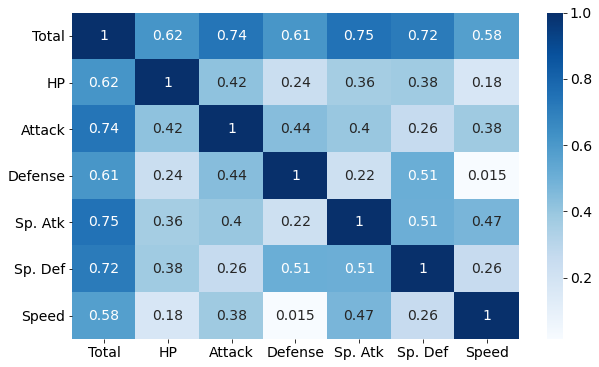

In [24]:
corr_mtrx = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
# annot - добавляем надписи на график
# cmap - устанавливаем цветовую палитру
sns.heatmap(corr_mtrx, annot=True, cmap='Blues')
plt.show()

После того, как проанализированы показатели корреляции - важно визуально оценить распределение данных.

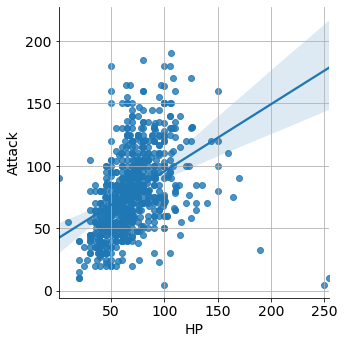

In [25]:
# График регрессионной зависимости в виде точечного графика
#   fit_reg - строится прямая по методу наименьших квадратов
sns.lmplot(x='HP', y='Attack', data=df, fit_reg=True)
plt.grid(True)
plt.show()

## Задание

Отобразите точечный график показателя атаки от защиты с разделением цветов по легендарности. Отключите построение прямой регрессии и отобразите разные группы маркерами 'x' и 'o'.

In [26]:
# TODO - оторазить точечный график с разделением по цвету группы

---

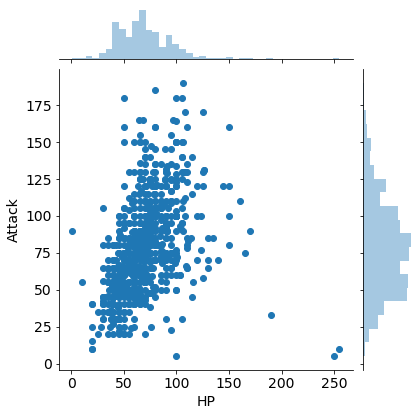

In [27]:
# Оторажение не только точечного графика, но и распределений каждого графика
sns.jointplot(x="HP", y="Attack", data=df);
plt.show()

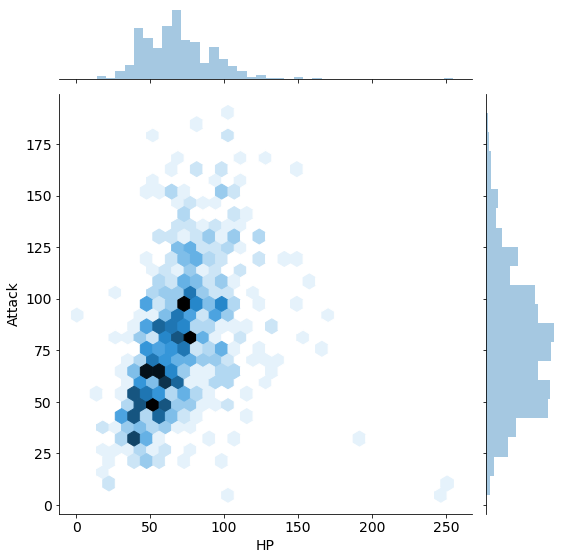

In [28]:
# Точки часто сливаются друг с другом - 
#   для сгруппированного отображения выведем в виде шестиугольников
sns.jointplot(x="HP", y="Attack", data=df, kind='hex', height=8.0)
plt.show()

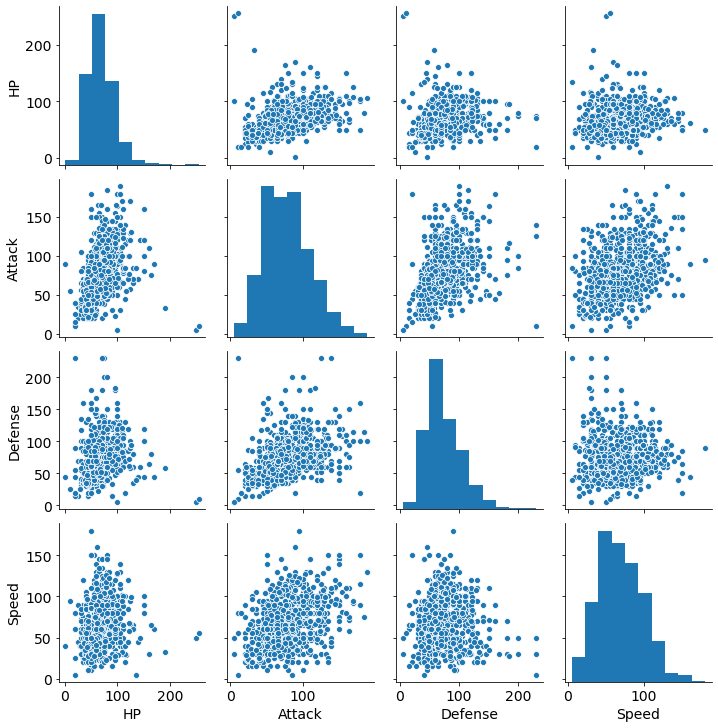

In [29]:
# Полезный график визуализации зависимостей сразу нескольких признаков
# По диагонали распределение самих признаков
# В остальных ячейках - зависимости признаков одной от другой
sns.pairplot(data=df, vars=['HP', 'Attack', 'Defense', 'Speed'])
plt.show()

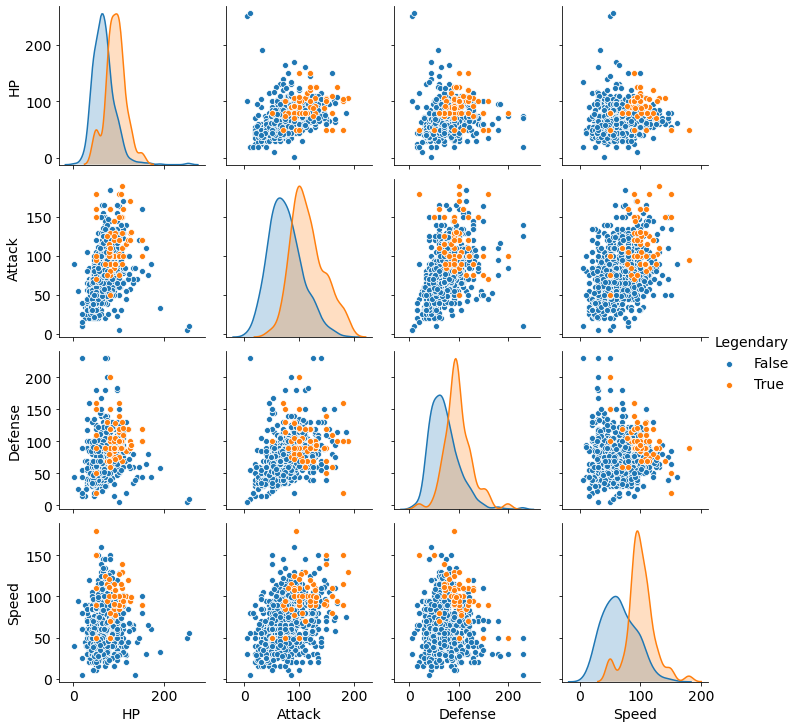

In [30]:
# Аналогично, можно задать отображение групп в виде цветов
sns.pairplot(data=df, vars=['HP', 'Attack', 'Defense', 'Speed'], hue='Legendary')
plt.show()

Последний инструмент для рассмотрения - автоматическое построение графиков в разных зонах в зависимости от групп.

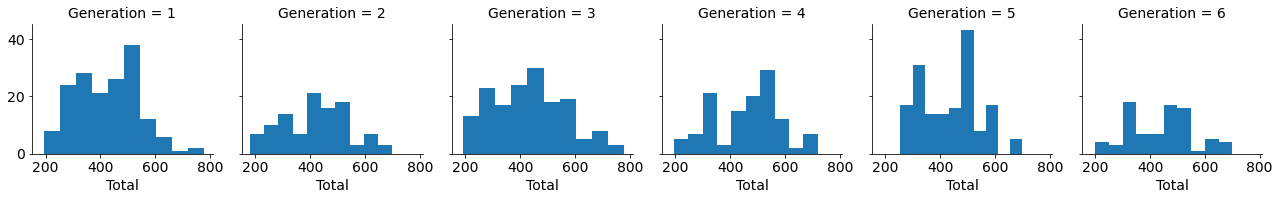

In [31]:
# FacetGrid - класс для построения разметки в зависимости 
#   от уникальных значений в данных 
g = sns.FacetGrid(df, col="Generation")
# После того, как разметка построена - делаем отображение 
#   путем задания типов графиков и самих данных
g = g.map(plt.hist, 'Total')
plt.show()

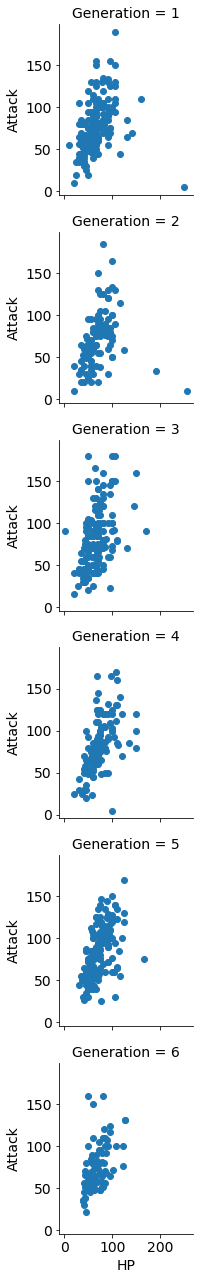

In [32]:
# Или точечный график в колонку
g = sns.FacetGrid(df, row="Generation")
g = g.map(plt.scatter, 'HP', 'Attack')
plt.show()

## Задание

Отобразите точечные графики показателей защиты от атаки. Разделите цветами по легендарности. Отобразите графики в ряд по поколениям:

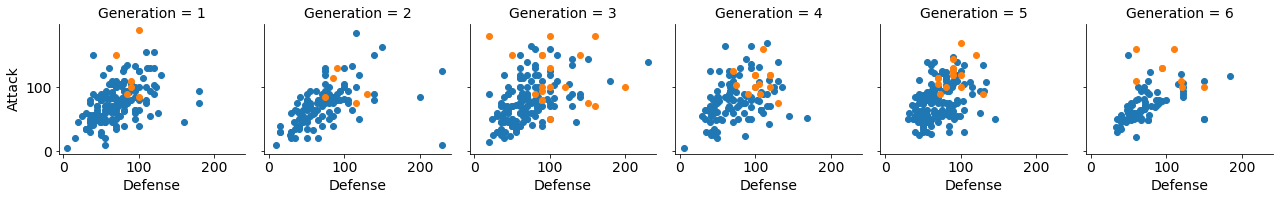

In [36]:
# TODO - отобразите графики по показателям в ряд

# NOTE - для отображения легенды необходимо вызвать FacetGrid.add_legend()
#           после отображения
g = sns.FacetGrid(df, col="Generation",hue='Legendary')
g = g.map(plt.scatter, 'Defense', 'Attack')

# Заключение

Применение seaborn позволяет упростить работу с визуализацией и интерпретацией данных. Рассмотренные в практике способы отображения не покрывают весь функционал, поэтому для более подробного разбора инструментария по каждому графику на официальном сайте имеется отличная [документация](https://seaborn.pydata.org/api.html) с примерами. 